# Empire State Building Bet

In this example suppose that you bet with your friend that you can always end up pass 60th floor of Empire State Building which has 100 floor, based on the following rules.

### How it works

1. Starts with 0 floor.
2. Roll a Dice with values from 1 to 6
3. If Dice value is 6 you'll get to roll again and move up to the next outcome of the dice roll.
4. If Dice value is 1 or 2 you'll get 1 floor down
5. If Dice value is 3, 4 or 5 you'll get 1 floor up.
6. You can't go below 0th floor and above 100th floor.
7. After 100 runs, you need to end up at or pass the 60th floor to win the bet.
8. One last this is that you have 0.1% chance of slipping and going back to 0 as well

In [1]:
# Import numpy and set the seed for generating Random number.
import numpy as np
np.random.seed(123)

In [2]:
# Initialize random_walk
all_walks = []

for i in range(500) :
    random_walk = [0]
    for j in range(100) :
        step = random_walk[-1]    
        dice = np.random.randint(1,7)

        if dice <= 2:
            # Replace below: use max to make sure step can't go below 0
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        
        # Implement clumsiness
        if np.random.rand() <= 0.001:
            step = 0
        elif step > 100 : # You can't go pass 100th floor
            step = 100
        
        random_walk.append(step)
        
    all_walks.append(random_walk)
    

#print(random_walk)
#print(all_walks)

# Visualize a single Random Walk

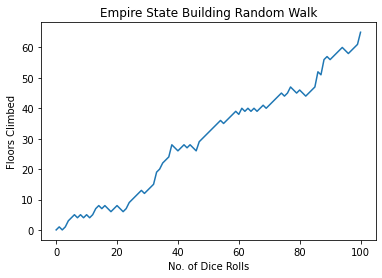

In [3]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

plt.xlabel("No. of Dice Rolls")
plt.ylabel("Floors Climbed")
plt.title("Empire State Building Random Walk")

# Show the plot
plt.show()

# Visualize all random walks

### All random walks is an array of arrays, each represents a single random walk

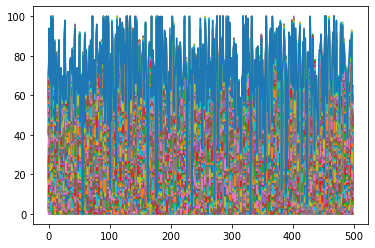

In [4]:
np_all_walks = np.array(all_walks)
plt.plot(np_all_walks)
plt.show()

# Transpose and visualize again
### Now this times it looks better. Each line from 10 lines now shows the points and progression for each dice roll. 

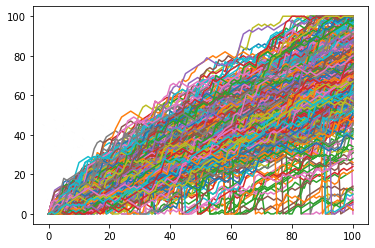

In [5]:
np_all_walks_t = np_all_walks.transpose()
plt.plot(np_all_walks_t)
plt.show()

# Select the last row from the transposed array and show the histogarm.
### This shows the Histogram of the last floor where each random walked have ended.

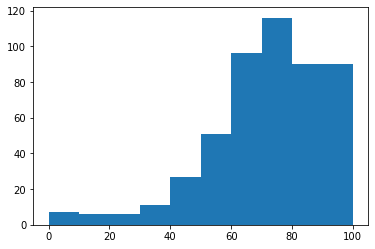

In [6]:
ends = np_all_walks_t[-1,:]
plt.hist(ends, bins=10)
plt.show()

# What are your chances to reach to or above 60th floor?

In [7]:
print("Mean:{}\nMin:{}\nMax:{}\nStd:{}".format(ends.mean(), ends.min(), ends.max(), ends.std()))
print("Your chances to reach above 60th floor is {}%".format(round((len(ends[ends >= 60]) * 100) / len(ends)), 2))

Mean:71.474
Min:0
Max:100
Std:19.63469694189345
Your chances to reach above 60th floor is 78%
